# White box model - Decision Tree Regression - (Dataset Diabetes)


In [28]:
# Decision Tree - basic idea is to find optimum splits in data features that best predict target variable.

In [29]:
# Steps -
# 1. Choose a feature & a threshold for that feature & based on that split into 2 subsets-
# subset1 where value of feature is less than or = threshold
# subset2 where value of feature is greater than threshold

In [30]:
# Objective
# Algorithm picks feature & threshold that minimizes a cost / impurity function

In [31]:
# Cost function for -
# Regresssion - Mean squared error
# Classification - Gini Impurity or Entropy

# Import Libraries

In [32]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X,y = diabetes['data'], diabetes['target']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
type(diabetes)

sklearn.utils.Bunch

In [34]:
print(diabetes.data.shape)
print("feature_names", diabetes.feature_names)

(442, 10)
feature_names ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [35]:
feature_rename = { 'age':'Age',
                   'sex' : 'Sex',
                   'bmi': 'BMI',
                   'bp': 'BP',
                   's1': 'Total Cholestrol',
                   's2' : 'LDL',
                   's3' : 'HDL',
                   's4' : 'Thyroid',
                   's5' : 'Glaucoma',
                   's6' : 'Glucose'}

In [36]:
df = pd.DataFrame(X,columns=diabetes['feature_names'])
df.rename(columns = feature_rename, inplace=True)
# To be used in feature_names parameter while plotting binary tree
df_features = df.copy()
df_features.head()

,Age,Sex,BMI,BP,Total Cholestrol,LDL,HDL,Thyroid,Glaucoma,Glucose
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [37]:
df['Target-Diabetes'] = y

# Dataset

In [38]:
df.head()

,Age,Sex,BMI,BP,Total Cholestrol,LDL,HDL,Thyroid,Glaucoma,Glucose,Target-Diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# EDA - Exploratory Data Analysis

In [39]:
# Correlation b/w features and each feature w.r.t target

# Pearson coefficient
corr = df.corr()
corr

,Age,Sex,BMI,BP,Total Cholestrol,LDL,HDL,Thyroid,Glaucoma,Glucose,Target-Diabetes
Age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
Sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
BP,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
Total Cholestrol,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
LDL,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
HDL,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
Thyroid,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
Glaucoma,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
Glucose,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


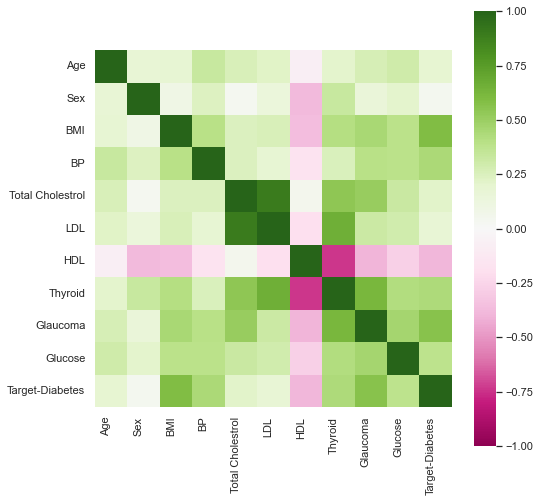

In [40]:
# Plot these values on heatmap

sns.set(style = 'whitegrid')
sns.set_palette('bright')

f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0,
            cmap='PiYG',
            square=True,
            ax=ax)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right');

# Modelling - Decision Tree
# Instantiate random_state in data & algorithm to replicate same o/p



In [41]:
# Training Decision Tree model - depth=None (Tree v large, all features)
# dt_model1 with depth 3 just to see binary tree function

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate
dt_model = DecisionTreeRegressor(max_depth=None,random_state=42)
dt_model1 = DecisionTreeRegressor(max_depth=3,random_state=42)


# Fit
dt_model.fit(X_train, y_train)
dt_model1.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Evaluate
mae = np.mean(np.abs(y_test - y_pred))
print(mae)

53.28089887640449


# Binary tree & Feature Importance
# XAI -> White-box  (by design interpretable)

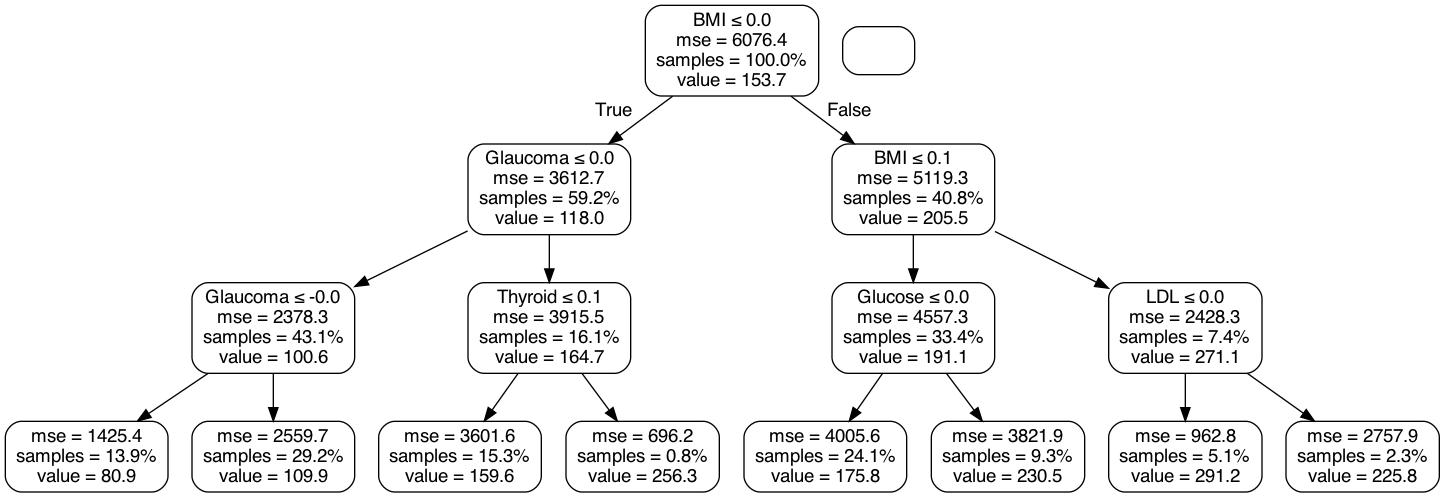

In [42]:
# Visualize Binary Tree - depth=None and depth=3

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Initialze string buffer to store binary tree/graph in DOT format.
# DOT = Graph description language
diabetes_dt_dot_data = StringIO()
diabetes_dt_dot_data1 = StringIO()


# Export decision tree model as binary tree in DOT format.
export_graphviz(dt_model1,
                out_file=diabetes_dt_dot_data1,
                filled=False,
                rounded=True,
                feature_names=df_features.columns,
                proportion=True,
                precision=1,
                special_characters=True)

export_graphviz(dt_model,
                out_file=diabetes_dt_dot_data,
                filled=False,
                rounded=True,
                feature_names=df_features.columns,
                proportion=True,
                precision=1,
                special_characters=True)

# Generate an image of Binary tree
dt_graph1 = pydotplus.graph_from_dot_data(diabetes_dt_dot_data1.getvalue())
dt_graph = pydotplus.graph_from_dot_data(diabetes_dt_dot_data.getvalue())


# Visualize binary tree using Image class
Image(dt_graph1.create_png())


In [43]:
Image(dt_graph.create_png())

# What makes Decision tree white box ?
## 1. BINARY TREE-
### It can be visualized as a bunch of if-else conditions strung together where each condition splits data into 2. This model can be easily visualized as a binary tree.
## 2. FEATURE IMPORTANCE-
### Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature. The most important features will be higher in the tree. A single feature can be used in different branches of the tree, feature importance then is its total contribution in reducing the impurity

In [44]:
# Get feature importance from trained decision tree model
weights = dt_model.feature_importances_
print(weights)

[0.0597504  0.00662175 0.41683685 0.0723761  0.08359051 0.04512797
 0.06023492 0.03358044 0.15753499 0.06434606]


In [45]:
feature_importance_index = np.argsort(np.abs(weights))[::-1]
print(feature_importance_index)

[2 8 4 3 9 6 0 5 7 1]


In [46]:
feature_importance_names = [df.columns[idx].upper() for idx in feature_importance_index]
feature_importance_names

['BMI',
 'GLAUCOMA',
 'TOTAL CHOLESTROL',
 'BP',
 'GLUCOSE',
 'HDL',
 'AGE',
 'LDL',
 'THYROID',
 'SEX']

In [47]:
feature_importance_values = [weights[idx] for idx in feature_importance_index]
print(feature_importance_values)

[0.41683684891383077, 0.15753499085296419, 0.08359050931682643, 0.0723761034314846, 0.06434606126997161, 0.060234923439890634, 0.05975039905527033, 0.04512797321715157, 0.033580444601438886, 0.006621745901170835]


Text(0, 0.5, 'Features')

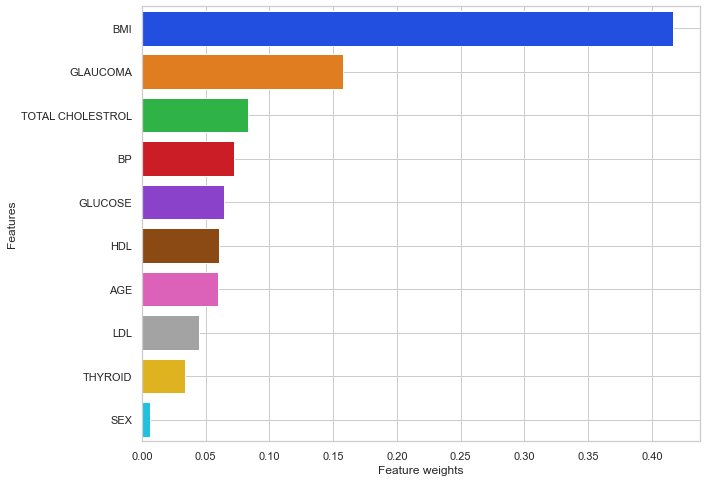

In [48]:
# Plot

f,ax = plt.subplots(figsize=(10,8))
sns.barplot(x=feature_importance_values, y=feature_importance_names, ax=ax)
ax.grid(True)
ax.set_xlabel('Feature weights')
ax.set_ylabel('Features')